In [3]:
import pandas as pd 
import numpy as np
import mysql.connector

In [4]:
##load the data 
games = pd.read_csv(r"C:\Users\uniq\Downloads\games.csv")
sales = pd.read_csv(r"C:\Users\uniq\Downloads\vgsales.csv")

In [5]:
print("Games Dataset Shape:", games.shape)
print("Sales Dataset Shape:", sales.shape)

# ===============================
# Step 3: Data Cleaning
# ===============================

# ---- Games Dataset ----
games.drop_duplicates(inplace=True)

games['Rating'] = games['Rating'].fillna(games['Rating'].median())
games['Genres'] = games['Genres'].fillna("Unknown")
games['Team'] = games['Team'].fillna("Unknown")

# Convert Release Date to datetime
games['Release Date'] = pd.to_datetime(games['Release Date'], errors='coerce')

# Normalize text fields
games['Genres'] = games['Genres'].str.strip().str.title()
games['Title'] = games['Title'].str.strip().str.title()
games['Team'] = games['Team'].str.strip().str.title()

# ---- Sales Dataset ----
sales.drop_duplicates(inplace=True)

sales['Year'] = sales['Year'].fillna(0).astype(int)
sales['Genre'] = sales['Genre'].fillna("Unknown")
sales['Publisher'] = sales['Publisher'].fillna("Unknown")

sales['Genre'] = sales['Genre'].str.strip().str.title()
sales['Name'] = sales['Name'].str.strip().str.title()
sales['Platform'] = sales['Platform'].str.strip().str.upper()
sales['Publisher'] = sales['Publisher'].str.strip().str.title()

# ===============================
# Step 4: Merge Datasets
# ===============================
# Merge ONLY on Title (games) and Name (sales)
merged = pd.merge(
    games,
    sales,
    left_on=['Title'],
    right_on=['Name'],
    how='inner'
)

print("Merged Dataset Shape:", merged.shape)
print(merged.head())

# ===============================
# Step 5: Save Cleaned Data
# ===============================
games.to_csv("clean_games.csv", index=False)
sales.to_csv("clean_vgsales.csv", index=False)
merged.to_csv("merged_games_sales.csv", index=False)

print("✅ Cleaned datasets saved!")



Games Dataset Shape: (1512, 14)
Sales Dataset Shape: (16598, 11)
Merged Dataset Shape: (1384, 25)
   Unnamed: 0      Title Release Date                Team  Rating  \
0           5  Minecraft   2011-11-18  ['Mojang Studios']     4.3   
1           5  Minecraft   2011-11-18  ['Mojang Studios']     4.3   
2           5  Minecraft   2011-11-18  ['Mojang Studios']     4.3   
3           5  Minecraft   2011-11-18  ['Mojang Studios']     4.3   
4           5  Minecraft   2011-11-18  ['Mojang Studios']     4.3   

  Times Listed Number of Reviews                      Genres  \
0         2.3K              2.3K  ['Adventure', 'Simulator']   
1         2.3K              2.3K  ['Adventure', 'Simulator']   
2         2.3K              2.3K  ['Adventure', 'Simulator']   
3         2.3K              2.3K  ['Adventure', 'Simulator']   
4         2.3K              2.3K  ['Adventure', 'Simulator']   

                                             Summary  \
0  Minecraft focuses on allowing the player to

C:\Users\uniq\AppData\Local\Temp\ipykernel_6932\2103160041.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


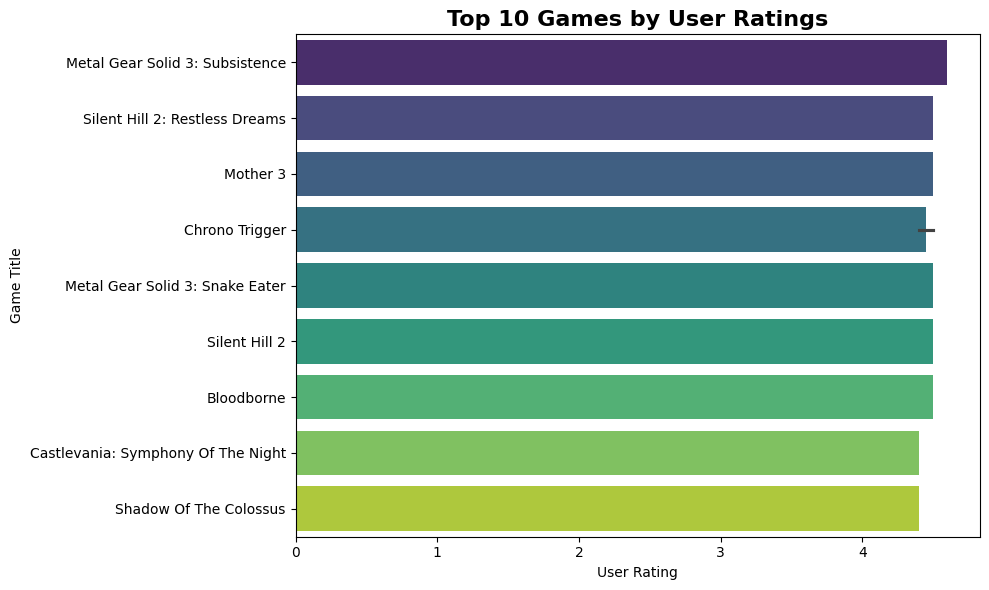

In [8]:
##What are the top-rated games by user reviews?
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `merged` is already created from your preprocessing steps
top_games = merged[['Title', 'Rating']].drop_duplicates().sort_values(by='Rating', ascending=False).head(10)

# Step 2: Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_games,
    x='Rating',
    y='Title',
    palette='viridis'
)

# Step 3: Style the plot
plt.title("Top 10 Games by User Ratings", fontsize=16, fontweight='bold')
plt.xlabel("User Rating")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()

C:\Users\uniq\AppData\Local\Temp\ipykernel_10744\3508874170.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


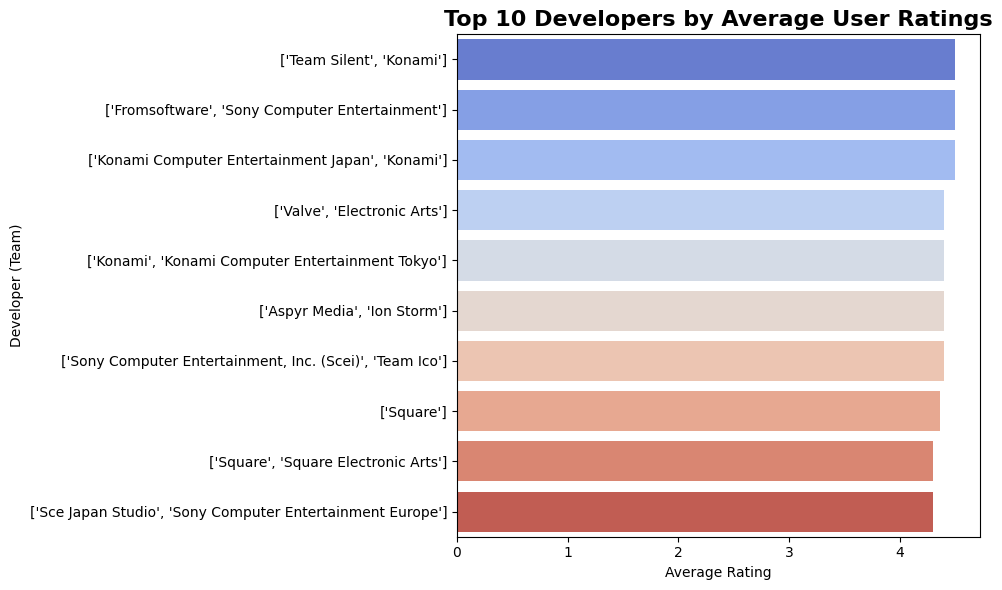

In [8]:
##🧑‍🤝‍🧑 Which developers (Teams) have the highest average ratings?

# Step 1: Group by Team and calculate average rating
team_ratings = (
    merged.groupby('Team', as_index=False)['Rating']
    .mean()
    .sort_values(by='Rating', ascending=False)
    .head(10)   # Top 10 teams
)

# Step 2: Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=team_ratings,
    x='Rating',
    y='Team',
    palette='coolwarm'
)

# Step 3: Style
plt.title("Top 10 Developers by Average User Ratings", fontsize=16, fontweight='bold')
plt.xlabel("Average Rating")
plt.ylabel("Developer (Team)")
plt.tight_layout()
plt.show()

C:\Users\uniq\AppData\Local\Temp\ipykernel_6932\1977217939.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


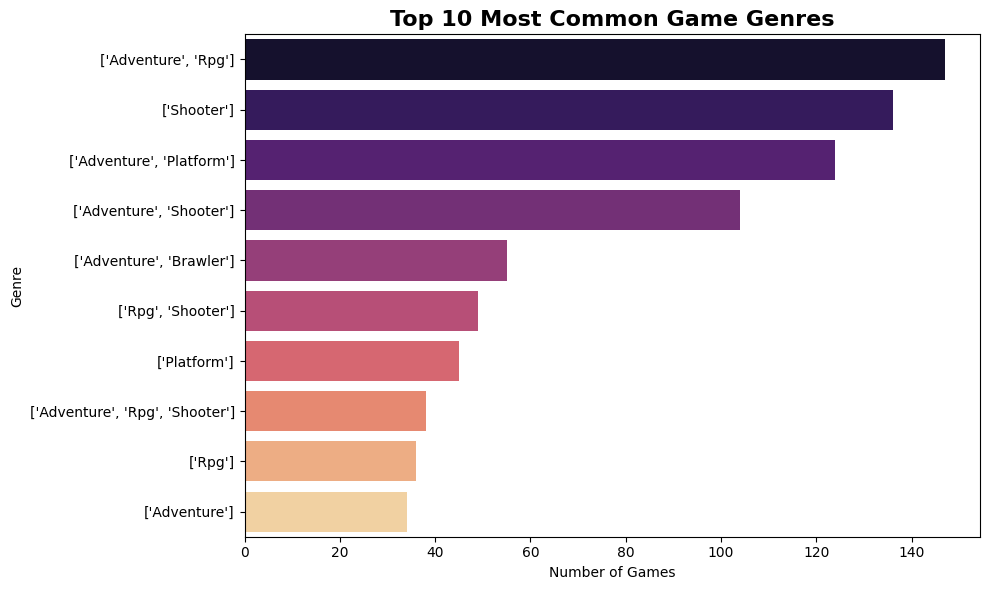

In [9]:
##What are the most common genres in the dataset?
# Step 1: Count genres and rename properly
genre_counts = merged['Genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']   # Force consistent names
genre_counts = genre_counts.head(10)

# Step 2: Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=genre_counts,
    x=genre_counts['Count'],
    y=genre_counts['Genre'],
    palette='magma'
)

# Step 3: Style
plt.title("Top 10 Most Common Game Genres", fontsize=16, fontweight='bold')
plt.xlabel("Number of Games")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

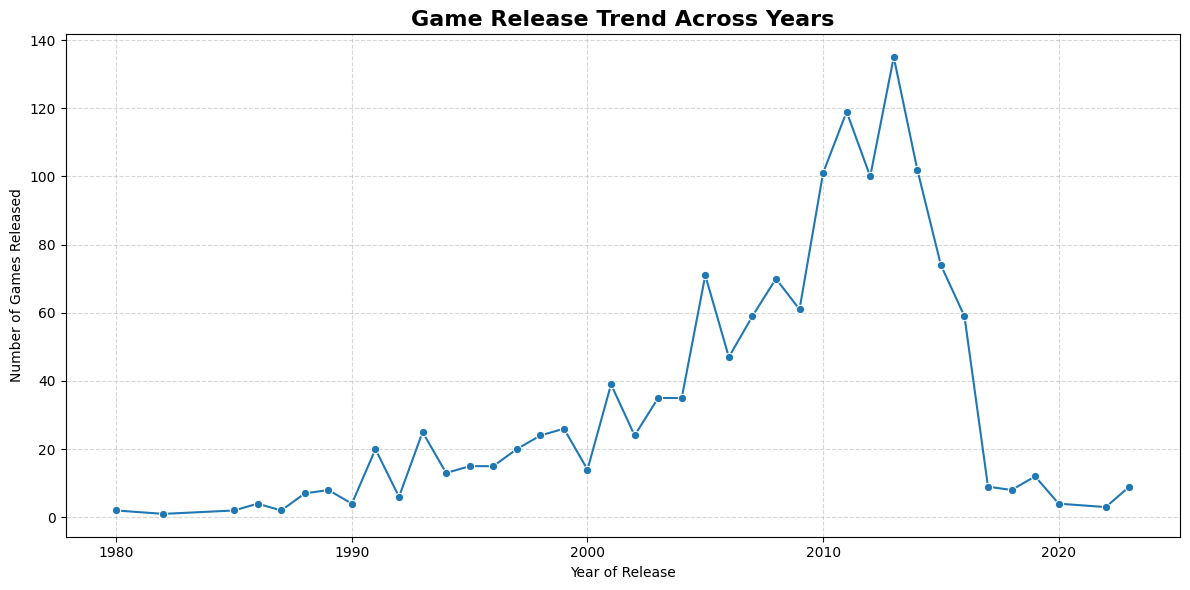

In [10]:
##What is the game release trend across years? 


# Step 1: Extract year from Release Date
merged['Release_Year'] = merged['Release Date'].dt.year

# Step 2: Count releases per year
release_trend = (
    merged['Release_Year']
    .value_counts()
    .reset_index()
)
release_trend.columns = ['Year', 'Count']   # force consistent column names
release_trend = release_trend.sort_values(by='Year')

# Step 3: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=release_trend,
    x='Year',
    y='Count',
    marker='o',
    color='tab:blue'
)

# Style
plt.title("Game Release Trend Across Years", fontsize=16, fontweight='bold')
plt.xlabel("Year of Release")
plt.ylabel("Number of Games Released")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

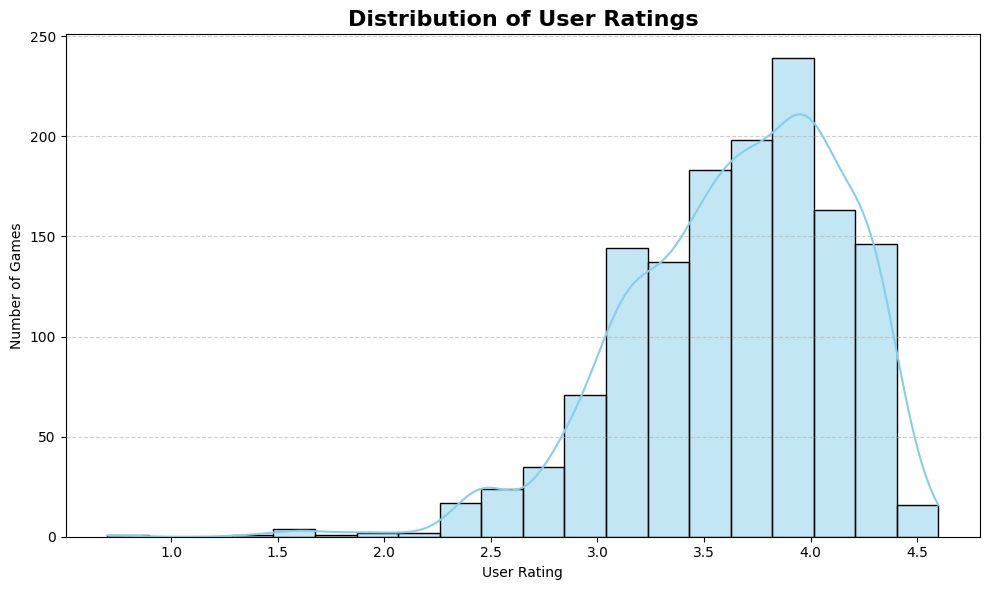

In [11]:
##What is the distribution of user ratings?
# Step 1: Plot histogram + KDE
plt.figure(figsize=(10, 6))
sns.histplot(
    data=merged,
    x='Rating',
    bins=20,
    kde=True,
    color='skyblue'
)

# Step 2: Style
plt.title("Distribution of User Ratings", fontsize=16, fontweight='bold')
plt.xlabel("User Rating")
plt.ylabel("Number of Games")
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\uniq\AppData\Local\Temp\ipykernel_6932\3897615665.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


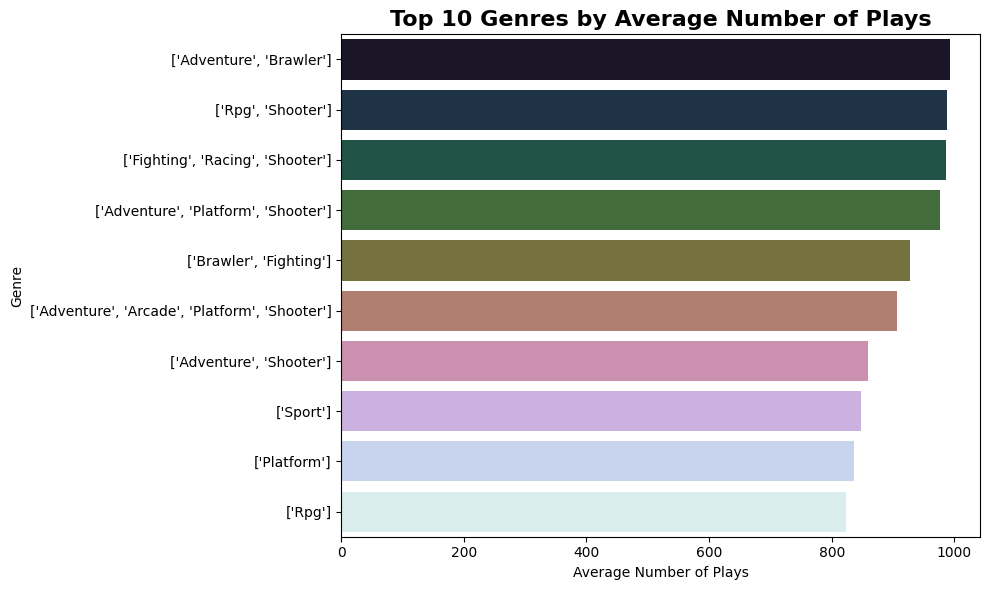

In [13]:
##What’s the average number of plays per genre?
# Step 0: Convert 'Plays' to numeric (force errors to NaN)
merged['Plays'] = pd.to_numeric(merged['Plays'], errors='coerce')

# Step 1: Group by Genre and calculate average plays
avg_plays_genre = (
    merged.groupby('Genres', as_index=False)['Plays']
    .mean()
    .sort_values(by='Plays', ascending=False)
    .head(10)   # top 10 genres
)

# Step 2: Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_plays_genre,
    x='Plays',
    y='Genres',
    palette='cubehelix'
)

# Step 3: Style
plt.title("Top 10 Genres by Average Number of Plays", fontsize=16, fontweight='bold')
plt.xlabel("Average Number of Plays")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

C:\Users\uniq\AppData\Local\Temp\ipykernel_6932\3480047872.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


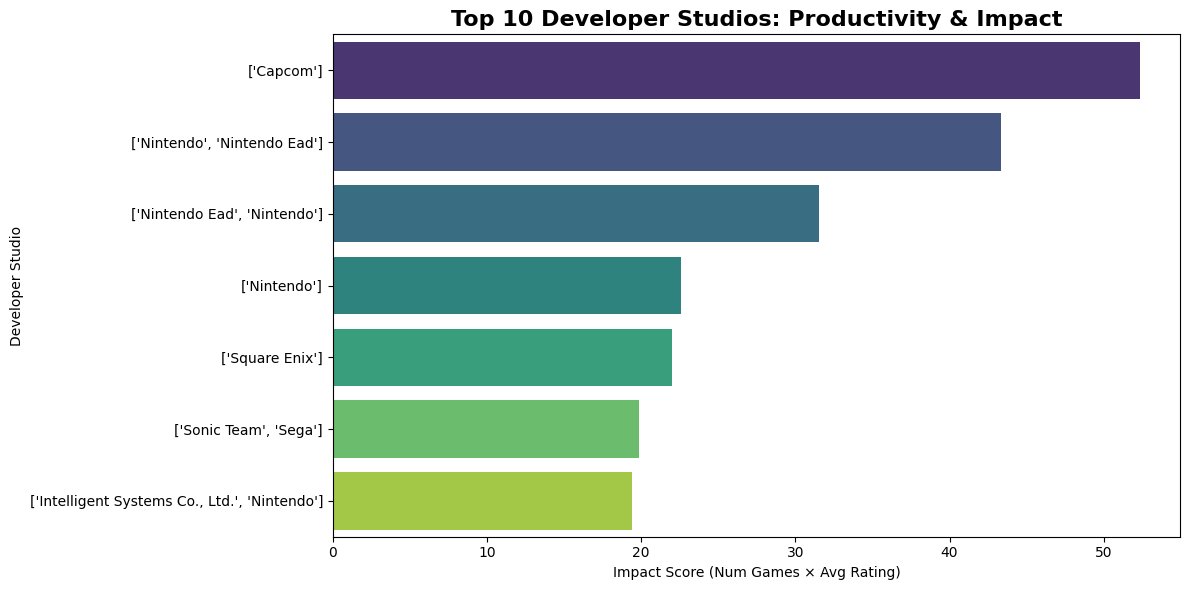

                                              Team  Num_Games  Avg_Rating  \
72                                      ['Capcom']         16    3.270588   
206                   ['Nintendo', 'Nintendo Ead']         11    3.938462   
181                   ['Nintendo Ead', 'Nintendo']          8    3.940000   
217                                   ['Nintendo']          6    3.769231   
278                                ['Square Enix']          6    3.662500   
257                         ['Sonic Team', 'Sega']          6    3.310000   
125  ['Intelligent Systems Co., Ltd.', 'Nintendo']          5    3.883333   

     Avg_Plays  Impact_Score  
72         NaN     52.329412  
206        NaN     43.323077  
181      340.0     31.520000  
217        NaN     22.615385  
278        NaN     21.975000  
257      797.0     19.860000  
125      820.0     19.416667  


In [14]:
##Which developer studios are the most productive and impactful? 
# Step 1: Ensure numeric columns
merged['Rating'] = pd.to_numeric(merged['Rating'], errors='coerce')
merged['Plays'] = pd.to_numeric(merged['Plays'], errors='coerce')

# Step 2: Aggregate by Team/Developer
studio_stats = (
    merged.groupby('Team', as_index=False)
    .agg(
        Num_Games=('Title', 'nunique'),
        Avg_Rating=('Rating', 'mean'),
        Avg_Plays=('Plays', 'mean')
    )
)

# Step 3: Filter studios with at least a minimum number of games (e.g., 5) to avoid noise
studio_stats = studio_stats[studio_stats['Num_Games'] >= 5]

# Step 4: Create a productivity-impact metric (example: Num_Games * Avg_Rating)
studio_stats['Impact_Score'] = studio_stats['Num_Games'] * studio_stats['Avg_Rating']

# Step 5: Top 10 most productive and impactful studios
top_studios = studio_stats.sort_values(by='Impact_Score', ascending=False).head(10)

# Step 6: Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_studios,
    x='Impact_Score',
    y='Team',
    palette='viridis'
)

plt.title("Top 10 Developer Studios: Productivity & Impact", fontsize=16, fontweight='bold')
plt.xlabel("Impact Score (Num Games × Avg Rating)")
plt.ylabel("Developer Studio")
plt.tight_layout()
plt.show()

print(top_studios[['Team', 'Num_Games', 'Avg_Rating', 'Avg_Plays', 'Impact_Score']])

C:\Users\uniq\AppData\Local\Temp\ipykernel_6932\2497365177.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


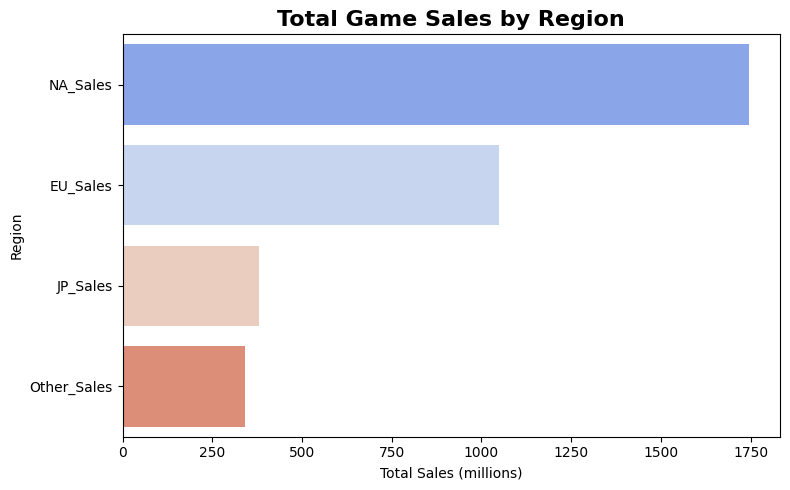

        Region  Total_Sales
0     NA_Sales      1744.91
1     EU_Sales      1049.47
2     JP_Sales       380.30
3  Other_Sales       340.67


In [15]:
##Which region generates the most game sales? 
# Step 1: Ensure sales columns are numeric
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_cols:
    if col in merged.columns:
        merged[col] = pd.to_numeric(merged[col], errors='coerce')
    else:
        print(f"⚠️ Column '{col}' not found in dataset.")

# Step 2: Sum total sales per region
region_sales = merged[sales_cols].sum().reset_index()
region_sales.columns = ['Region', 'Total_Sales']

# Step 3: Sort descending
region_sales = region_sales.sort_values(by='Total_Sales', ascending=False)

# Step 4: Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=region_sales,
    x='Total_Sales',
    y='Region',
    palette='coolwarm'
)

plt.title("Total Game Sales by Region", fontsize=16, fontweight='bold')
plt.xlabel("Total Sales (millions)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

print(region_sales)

C:\Users\uniq\AppData\Local\Temp\ipykernel_6932\1946891820.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


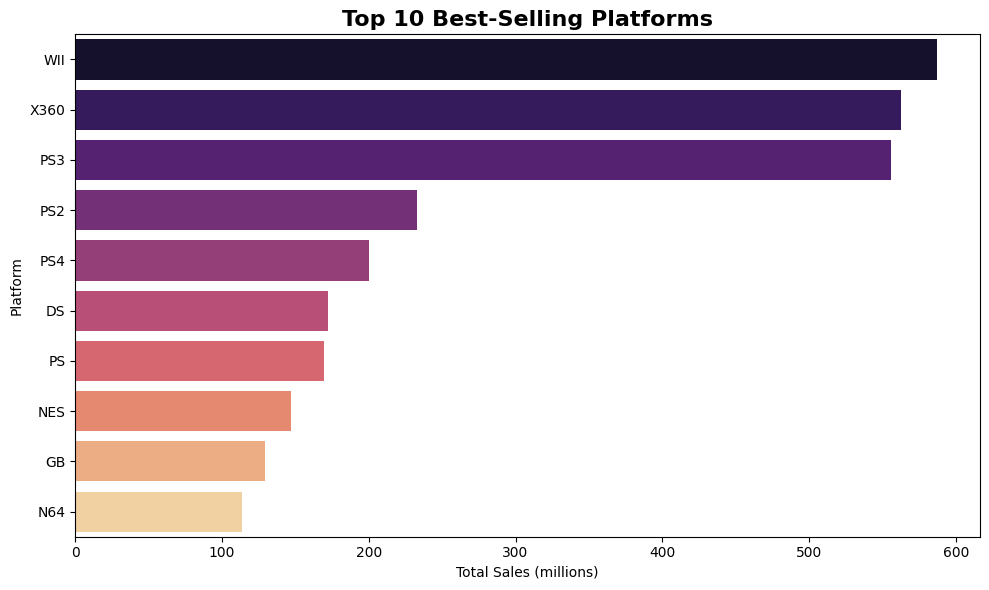

   Platform  Total_Sales
20      WII       587.05
22     X360       562.37
13      PS3       555.83
12      PS2       232.91
14      PS4       200.29
3        DS       172.48
11       PS       169.80
9       NES       146.86
4        GB       129.23
8       N64       113.75


In [16]:
##What are the best-selling platforms?

# Step 1: Ensure sales columns exist and are numeric
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_cols:
    if col in merged.columns:
        merged[col] = pd.to_numeric(merged[col], errors='coerce')

# Step 2: Calculate total sales per game
merged['Total_Sales'] = merged[sales_cols].sum(axis=1)

# Step 3: Aggregate total sales per platform
platform_sales = (
    merged.groupby('Platform', as_index=False)['Total_Sales']
    .sum()
    .sort_values(by='Total_Sales', ascending=False)
    .head(10)  # Top 10 platforms
)

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=platform_sales,
    x='Total_Sales',
    y='Platform',
    palette='magma'
)

plt.title("Top 10 Best-Selling Platforms", fontsize=16, fontweight='bold')
plt.xlabel("Total Sales (millions)")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()

print(platform_sales)

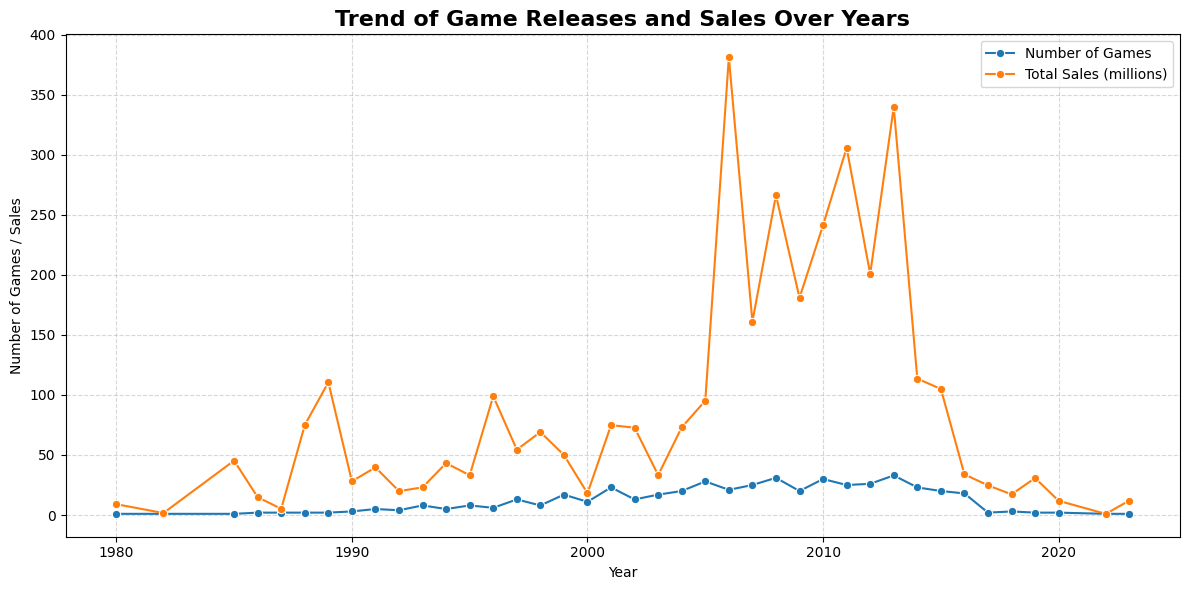

   Release_Year  Num_Games  Total_Sales
0          1980          1         9.03
1          1982          1         1.66
2          1985          1        45.31
3          1986          2        14.86
4          1987          2         5.19
5          1988          2        74.93
6          1989          2       110.54
7          1990          3        28.11
8          1991          5        39.67
9          1992          4        19.89


In [17]:
##What’s the trend of game releases and sales over years?

# Step 1: Extract year
merged['Release_Year'] = merged['Release Date'].dt.year

# Step 2: Calculate total sales per game
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

merged['Total_Sales'] = merged[sales_cols].sum(axis=1)

# Step 3: Aggregate by year
yearly_trend = merged.groupby('Release_Year').agg(
    Num_Games=('Title', 'nunique'),
    Total_Sales=('Total_Sales', 'sum')
).reset_index().sort_values('Release_Year')

# Step 4: Plot trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trend, x='Release_Year', y='Num_Games', marker='o', label='Number of Games', color='tab:blue')
sns.lineplot(data=yearly_trend, x='Release_Year', y='Total_Sales', marker='o', label='Total Sales (millions)', color='tab:orange')

plt.title("Trend of Game Releases and Sales Over Years", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Games / Sales")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(yearly_trend.head(10))

C:\Users\uniq\AppData\Local\Temp\ipykernel_6932\2911385042.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


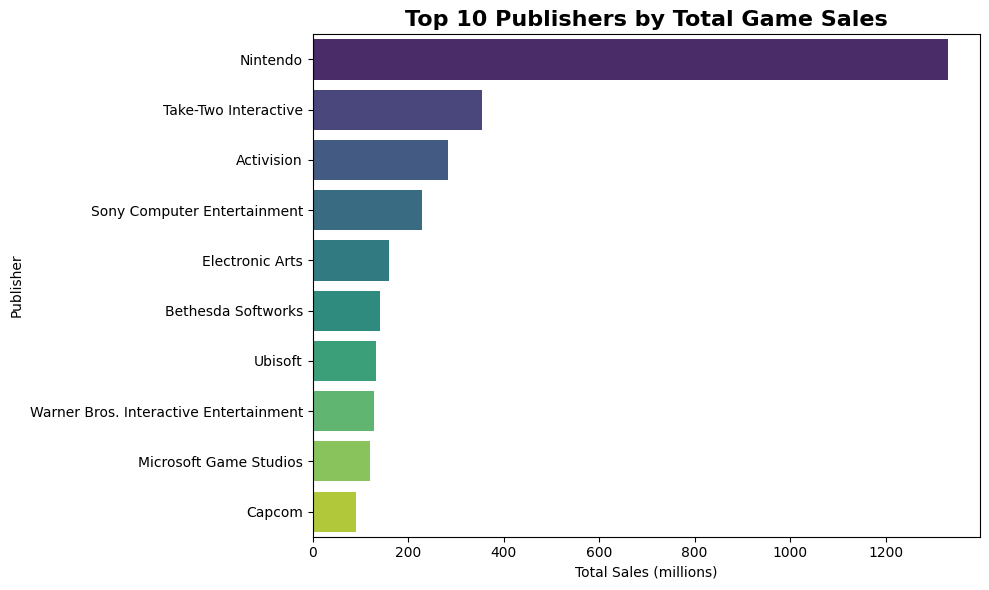

                                 Publisher  Total_Sales
35                                Nintendo      1331.05
49                    Take-Two Interactive       354.47
3                               Activision       282.72
44             Sony Computer Entertainment       229.34
16                         Electronic Arts       159.60
10                      Bethesda Softworks       141.90
53                                 Ubisoft       132.60
59  Warner Bros. Interactive Entertainment       127.93
31                  Microsoft Game Studios       119.82
11                                  Capcom        90.52


In [18]:
## Who are the top publishers by sales? 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Ensure regional sales are numeric
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

# Step 2: Compute total sales per game
merged['Total_Sales'] = merged[sales_cols].sum(axis=1)

# Step 3: Aggregate total sales per publisher
publisher_sales = (
    merged.groupby('Publisher', as_index=False)['Total_Sales']
    .sum()
    .sort_values(by='Total_Sales', ascending=False)
    .head(10)  # Top 10 publishers
)

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=publisher_sales,
    x='Total_Sales',
    y='Publisher',
    palette='viridis'
)

plt.title("Top 10 Publishers by Total Game Sales", fontsize=16, fontweight='bold')
plt.xlabel("Total Sales (millions)")
plt.ylabel("Publisher")
plt.tight_layout()
plt.show()

print(publisher_sales)

C:\Users\uniq\AppData\Local\Temp\ipykernel_6932\648322933.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


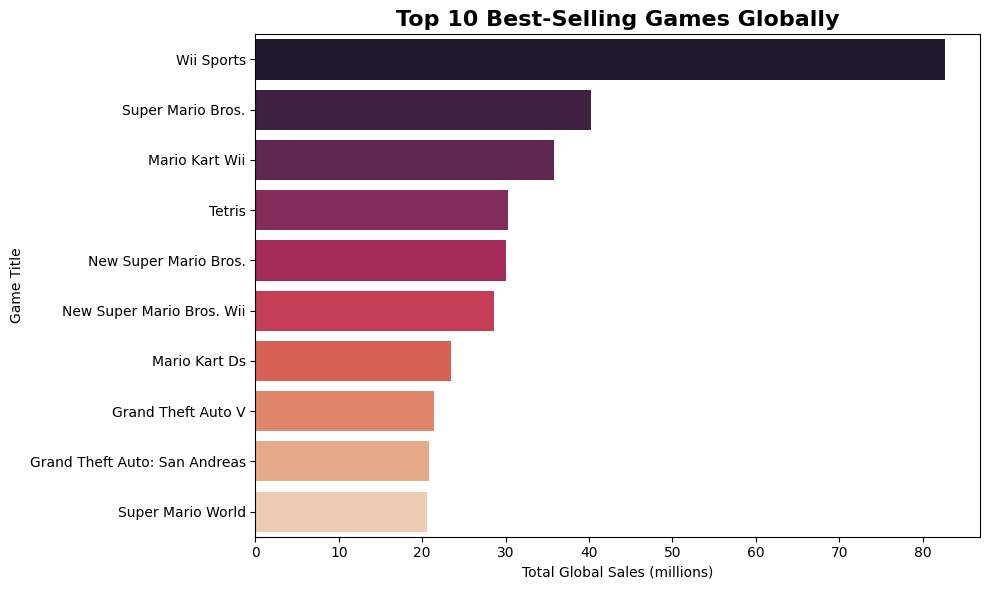

                             Title  Total_Sales
138                     Wii Sports        82.74
62               Super Mario Bros.        40.24
139                 Mario Kart Wii        35.83
233                         Tetris        30.26
157          New Super Mario Bros.        30.01
209      New Super Mario Bros. Wii        28.61
886                  Mario Kart Ds        23.43
13              Grand Theft Auto V        21.39
85   Grand Theft Auto: San Andreas        20.81
57               Super Mario World        20.62


In [19]:
##Which games are the top 10 best-sellers globally? 

# Step 1: Ensure regional sales columns are numeric
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

# Step 2: Compute total global sales per game
merged['Total_Sales'] = merged[sales_cols].sum(axis=1)

# Step 3: Get top 10 best-selling games
top_games = (
    merged[['Title', 'Total_Sales']]
    .drop_duplicates()
    .sort_values(by='Total_Sales', ascending=False)
    .head(10)
)

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_games,
    x='Total_Sales',
    y='Title',
    palette='rocket'
)

plt.title("Top 10 Best-Selling Games Globally", fontsize=16, fontweight='bold')
plt.xlabel("Total Global Sales (millions)")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()

print(top_games)

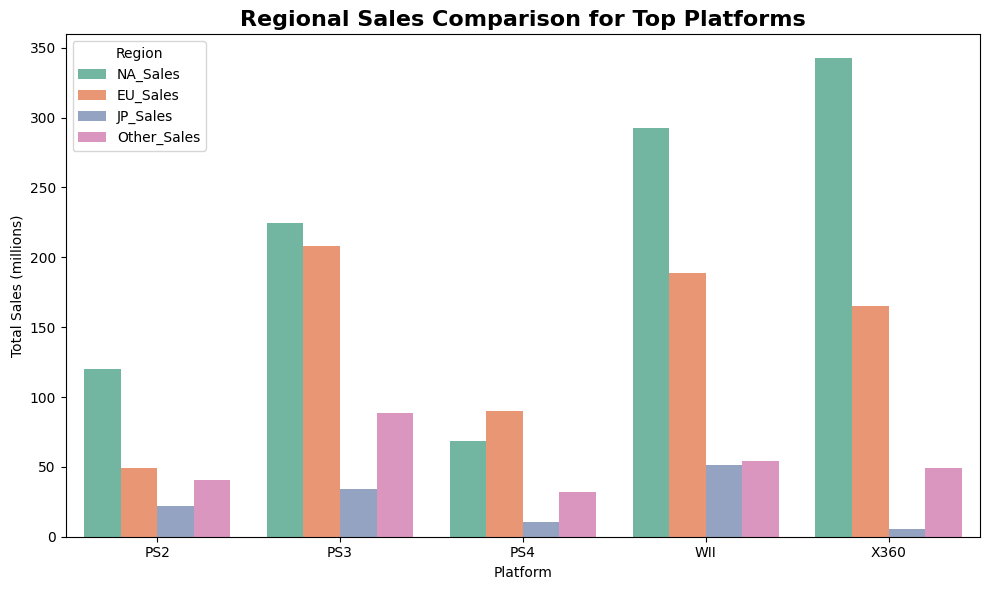

In [21]:
##How do regional sales compare for specific platforms?
# Step 1: Ensure regional sales columns are numeric
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

# Step 2: Select platforms of interest (example: top 5 by total sales)
merged['Total_Sales'] = merged[sales_cols].sum(axis=1)
top_platforms = (
    merged.groupby('Platform', as_index=False)['Total_Sales']
    .sum()
    .sort_values(by='Total_Sales', ascending=False)
    .head(5)['Platform']
)

# Step 3: Aggregate regional sales per selected platform
regional_sales = (
    merged[merged['Platform'].isin(top_platforms)]
    .groupby('Platform')[sales_cols]
    .sum()
    .reset_index()
)

# Step 4: Melt for easier plotting
regional_sales_melted = regional_sales.melt(
    id_vars='Platform',
    value_vars=sales_cols,
    var_name='Region',
    value_name='Sales'
)

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=regional_sales_melted,
    x='Platform',
    y='Sales',
    hue='Region',
    palette='Set2'
)

plt.title("Regional Sales Comparison for Top Platforms", fontsize=16, fontweight='bold')
plt.xlabel("Platform")
plt.ylabel("Total Sales (millions)")
plt.legend(title='Region')
plt.tight_layout()
plt.show()

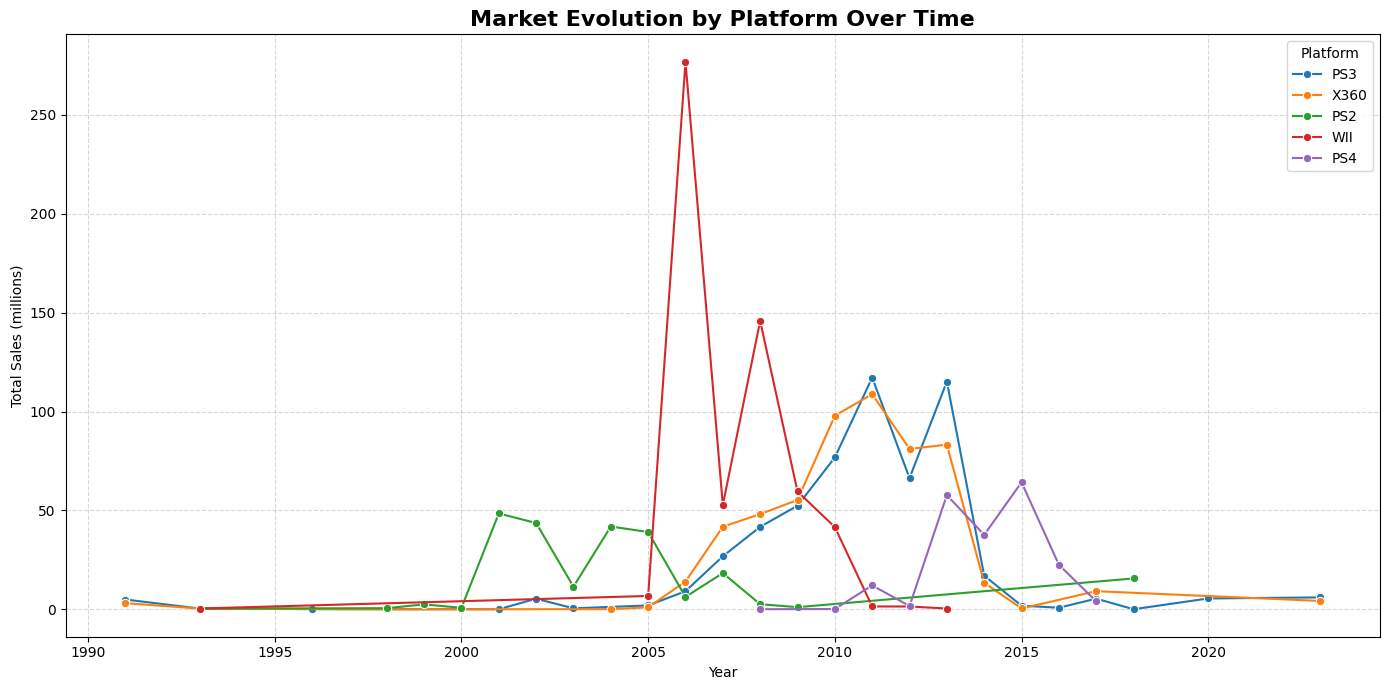

In [22]:
##How has the market evolved by platform over time?

# Step 1: Ensure regional sales columns are numeric
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

# Step 2: Compute total sales per game
merged['Total_Sales'] = merged[sales_cols].sum(axis=1)

# Step 3: Extract release year
merged['Release_Year'] = merged['Release Date'].dt.year

# Step 4: Aggregate total sales by platform and year
platform_trend = (
    merged.groupby(['Release_Year', 'Platform'], as_index=False)['Total_Sales']
    .sum()
)

# Optional: focus on top 5 platforms by total sales
top_platforms = (
    merged.groupby('Platform')['Total_Sales'].sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)
platform_trend = platform_trend[platform_trend['Platform'].isin(top_platforms)]

# Step 5: Plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=platform_trend,
    x='Release_Year',
    y='Total_Sales',
    hue='Platform',
    marker='o'
)

plt.title("Market Evolution by Platform Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Total Sales (millions)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

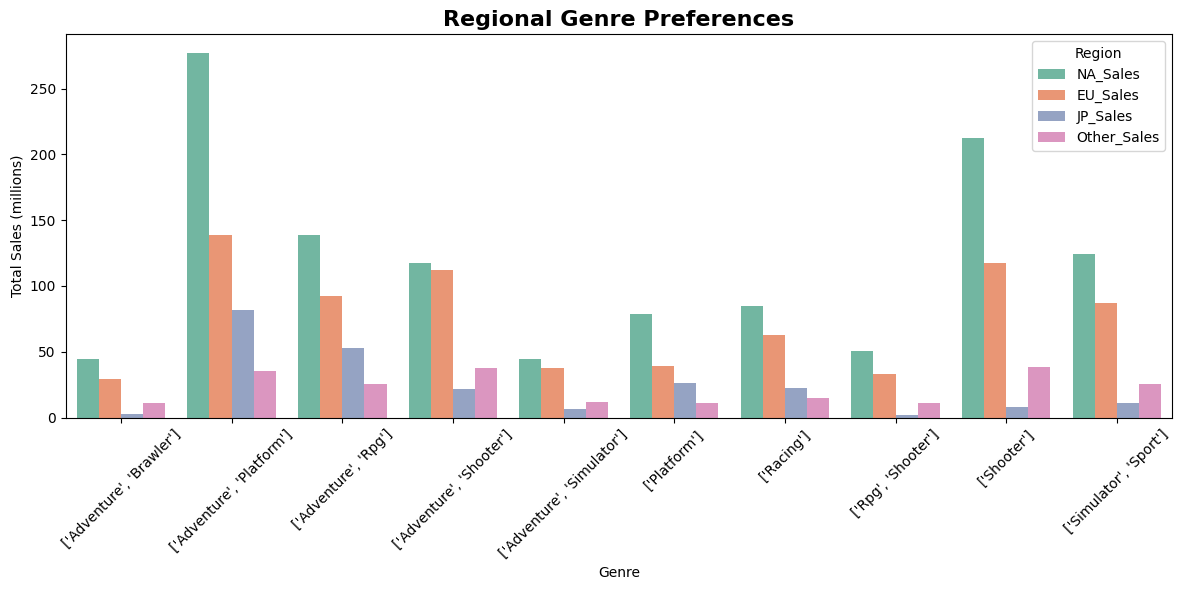

In [23]:
##What are the regional genre preferences?
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Ensure regional sales columns are numeric
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

# Step 2: Aggregate total sales by genre and region
genre_region_sales = (
    merged.groupby('Genres')[sales_cols]
    .sum()
    .reset_index()
)

# Step 3: Melt for easier plotting
genre_region_melted = genre_region_sales.melt(
    id_vars='Genres',
    value_vars=sales_cols,
    var_name='Region',
    value_name='Sales'
)

# Step 4: Optional - focus on top 10 genres globally
top_genres = genre_region_sales.set_index('Genres').sum(axis=1).sort_values(ascending=False).head(10).index
genre_region_melted = genre_region_melted[genre_region_melted['Genres'].isin(top_genres)]

# Step 5: Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=genre_region_melted,
    x='Genres',
    y='Sales',
    hue='Region',
    palette='Set2'
)

plt.title("Regional Genre Preferences", fontsize=16, fontweight='bold')
plt.xlabel("Genre")
plt.ylabel("Total Sales (millions)")
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

C:\Users\uniq\AppData\Local\Temp\ipykernel_6932\2894787461.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


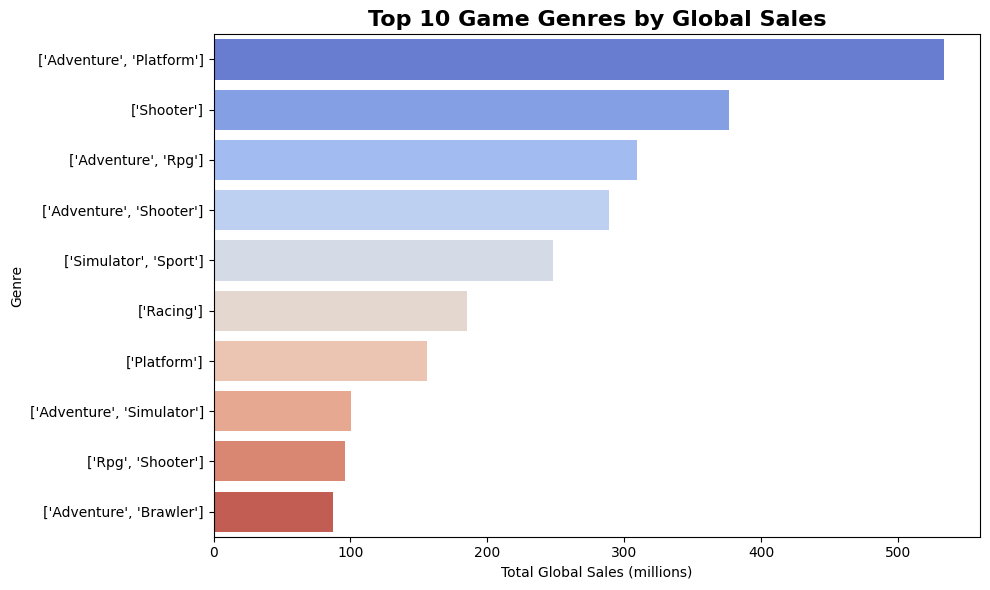

                         Genres  Total_Sales
29    ['Adventure', 'Platform']       533.26
102                 ['Shooter']       376.92
51         ['Adventure', 'Rpg']       309.48
54     ['Adventure', 'Shooter']       289.08
103      ['Simulator', 'Sport']       248.22
89                   ['Racing']       185.20
84                 ['Platform']       155.67
56   ['Adventure', 'Simulator']       100.15
91           ['Rpg', 'Shooter']        96.07
14     ['Adventure', 'Brawler']        87.40


In [24]:
##Which game genres generate the most global sales?
# Step 1: Ensure regional sales columns are numeric
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

# Step 2: Compute total global sales per genre
merged['Total_Sales'] = merged[sales_cols].sum(axis=1)
genre_sales = (
    merged.groupby('Genres', as_index=False)['Total_Sales']
    .sum()
    .sort_values(by='Total_Sales', ascending=False)
    .head(10)  # top 10 genres
)

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=genre_sales,
    x='Total_Sales',
    y='Genres',
    palette='coolwarm'
)

plt.title("Top 10 Game Genres by Global Sales", fontsize=16, fontweight='bold')
plt.xlabel("Total Global Sales (millions)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

print(genre_sales)

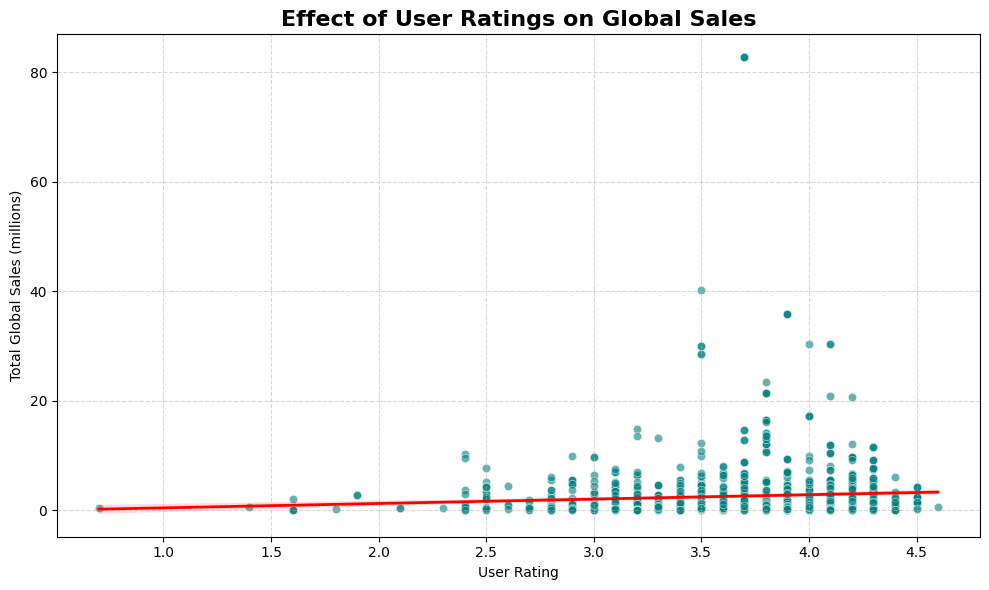

In [25]:
##How does user rating affect global sales?
# Step 1: Ensure numeric columns
merged['Rating'] = pd.to_numeric(merged['Rating'], errors='coerce')
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

# Step 2: Compute total global sales per game
merged['Total_Sales'] = merged[sales_cols].sum(axis=1)

# Step 3: Scatter plot of Rating vs Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged,
    x='Rating',
    y='Total_Sales',
    alpha=0.6,
    color='teal'
)

# Optional: add trend line
sns.regplot(
    data=merged,
    x='Rating',
    y='Total_Sales',
    scatter=False,
    color='red',
    line_kws={'linewidth':2}
)

plt.title("Effect of User Ratings on Global Sales", fontsize=16, fontweight='bold')
plt.xlabel("User Rating")
plt.ylabel("Total Global Sales (millions)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\uniq\AppData\Local\Temp\ipykernel_6932\1864632967.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


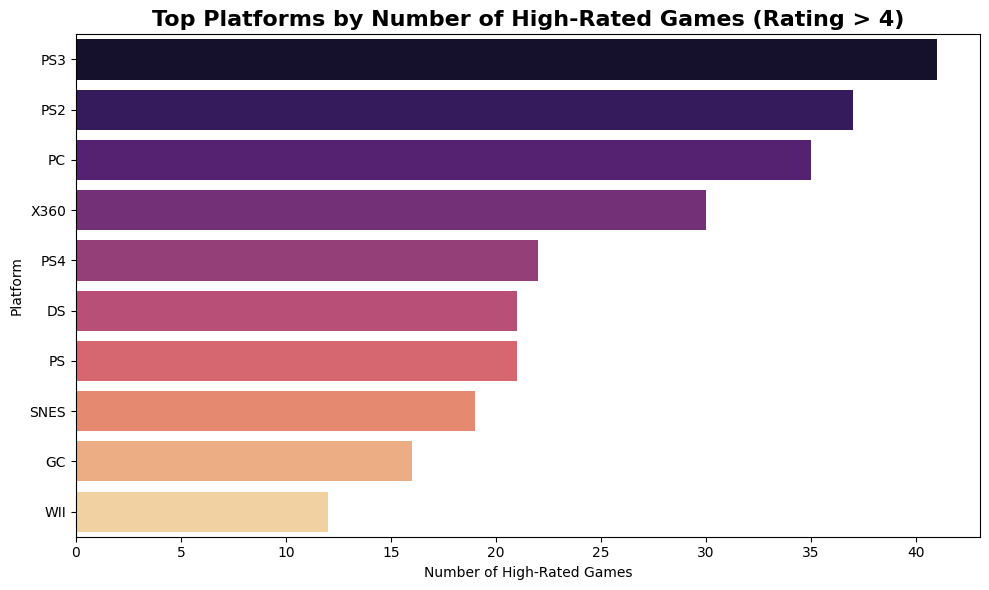

   Platform  High_Rated_Count
10      PS3                41
9       PS2                37
7        PC                35
18     X360                30
11      PS4                22
1        DS                21
8        PS                21
15     SNES                19
4        GC                16
16      WII                12


In [26]:
##Which platforms have the most games with high ratings (e.g., above 4)?
# Step 1: Ensure Rating is numeric
merged['Rating'] = pd.to_numeric(merged['Rating'], errors='coerce')

# Step 2: Filter games with high ratings (above 4)
high_rated_games = merged[merged['Rating'] > 4]

# Step 3: Count number of high-rated games per platform
platform_counts = (
    high_rated_games.groupby('Platform', as_index=False)['Title']
    .count()
    .rename(columns={'Title': 'High_Rated_Count'})
    .sort_values(by='High_Rated_Count', ascending=False)
    .head(10)  # Top 10 platforms
)

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=platform_counts,
    x='High_Rated_Count',
    y='Platform',
    palette='magma'
)

plt.title("Top Platforms by Number of High-Rated Games (Rating > 4)", fontsize=16, fontweight='bold')
plt.xlabel("Number of High-Rated Games")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()

print(platform_counts)

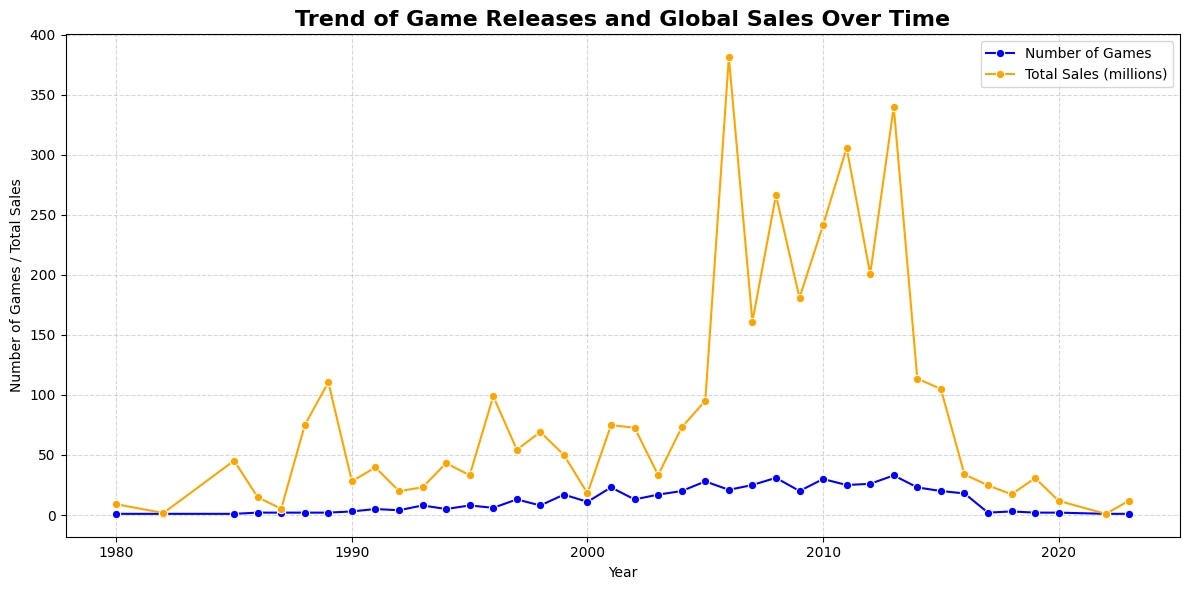

   Release_Year  Num_Games  Total_Sales
0          1980          1         9.03
1          1982          1         1.66
2          1985          1        45.31
3          1986          2        14.86
4          1987          2         5.19
5          1988          2        74.93
6          1989          2       110.54
7          1990          3        28.11
8          1991          5        39.67
9          1992          4        19.89


In [28]:
##What’s the trend of releases and sales over time?
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Ensure numeric sales columns
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

# Step 2: Compute total global sales per game
merged['Total_Sales'] = merged[sales_cols].sum(axis=1)

# Step 3: Extract release year
merged['Release_Year'] = merged['Release Date'].dt.year

# Step 4: Aggregate by year
yearly_trend = merged.groupby('Release_Year').agg(
    Num_Games=('Title', 'nunique'),
    Total_Sales=('Total_Sales', 'sum')
).reset_index().sort_values('Release_Year')

# Step 5: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trend, x='Release_Year', y='Num_Games', marker='o', label='Number of Games', color='blue')
sns.lineplot(data=yearly_trend, x='Release_Year', y='Total_Sales', marker='o', label='Total Sales (millions)', color='orange')

plt.title("Trend of Game Releases and Global Sales Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Games / Total Sales")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(yearly_trend.head(10))

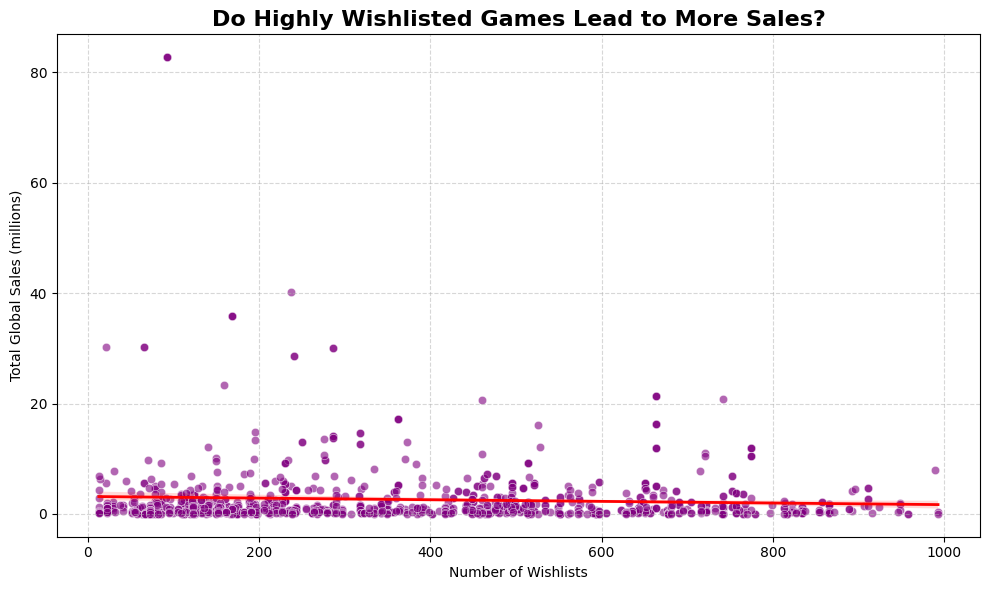

Correlation between Wishlist count and Total Sales: -0.06


In [30]:
## Do highly wishlisted games lead to more sales?
# Step 1: Ensure numeric columns
merged['Wishlist'] = pd.to_numeric(merged['Wishlist'], errors='coerce')
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

# Step 2: Compute total global sales per game
merged['Total_Sales'] = merged[sales_cols].sum(axis=1)

# Step 3: Scatter plot of Wishlist vs Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged,
    x='Wishlist',
    y='Total_Sales',
    alpha=0.6,
    color='purple'
)

# Optional: add regression line to see trend
sns.regplot(
    data=merged,
    x='Wishlist',
    y='Total_Sales',
    scatter=False,
    color='red',
    line_kws={'linewidth':2}
)

plt.title("Do Highly Wishlisted Games Lead to More Sales?", fontsize=16, fontweight='bold')
plt.xlabel("Number of Wishlists")
plt.ylabel("Total Global Sales (millions)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Step 4: Optional: calculate correlation
correlation = merged[['Wishlist', 'Total_Sales']].corr().iloc[0, 1]
print(f"Correlation between Wishlist count and Total Sales: {correlation:.2f}")

C:\Users\uniq\AppData\Local\Temp\ipykernel_6932\3058731824.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


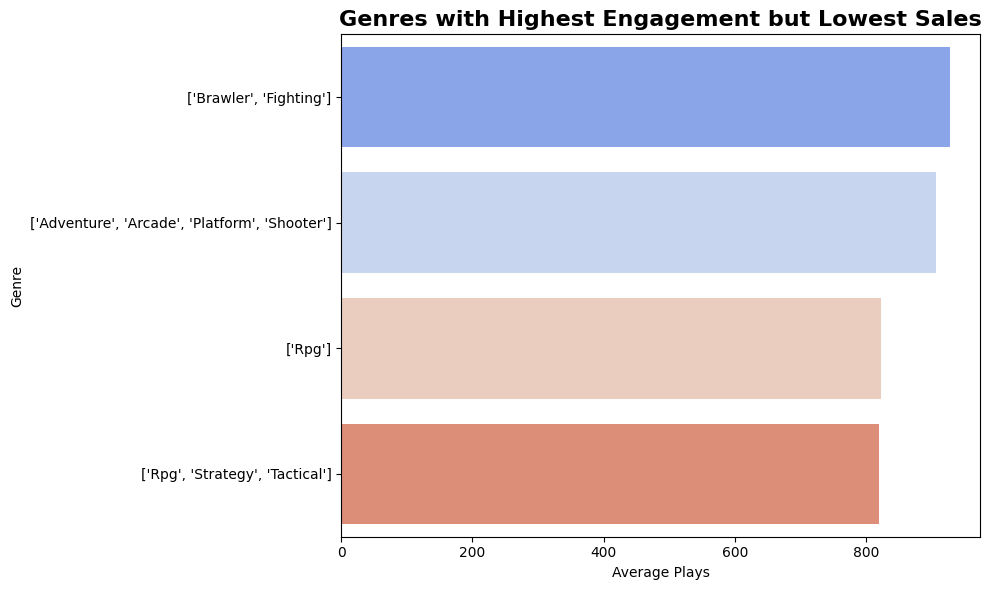

                                            Genres  Avg_Engagement  Avg_Sales
67                         ['Brawler', 'Fighting']      927.000000   0.363333
0   ['Adventure', 'Arcade', 'Platform', 'Shooter']      907.000000   0.026667
98                                         ['Rpg']      822.666667   0.760833
95                 ['Rpg', 'Strategy', 'Tactical']      820.000000   0.343333


In [31]:
##Which genres have the highest engagement but lowest sales?
# Step 1: Ensure numeric columns
engagement_col = 'Plays'  # or 'Wishlist' if you prefer
merged[engagement_col] = pd.to_numeric(merged[engagement_col], errors='coerce')

sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

# Step 2: Compute total global sales
merged['Total_Sales'] = merged[sales_cols].sum(axis=1)

# Step 3: Aggregate by genre
genre_stats = (
    merged.groupby('Genres', as_index=False).agg(
        Avg_Engagement=(engagement_col, 'mean'),
        Avg_Sales=('Total_Sales', 'mean')
    )
)

# Step 4: Identify genres with high engagement but low sales
# Here, we define "high engagement" and "low sales" as above and below median
engagement_median = genre_stats['Avg_Engagement'].median()
sales_median = genre_stats['Avg_Sales'].median()

high_engagement_low_sales = genre_stats[
    (genre_stats['Avg_Engagement'] > engagement_median) &
    (genre_stats['Avg_Sales'] < sales_median)
].sort_values(by='Avg_Engagement', ascending=False)

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=high_engagement_low_sales,
    x='Avg_Engagement',
    y='Genres',
    palette='coolwarm'
)

plt.title("Genres with Highest Engagement but Lowest Sales", fontsize=16, fontweight='bold')
plt.xlabel(f"Average {engagement_col}")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

print(high_engagement_low_sales)

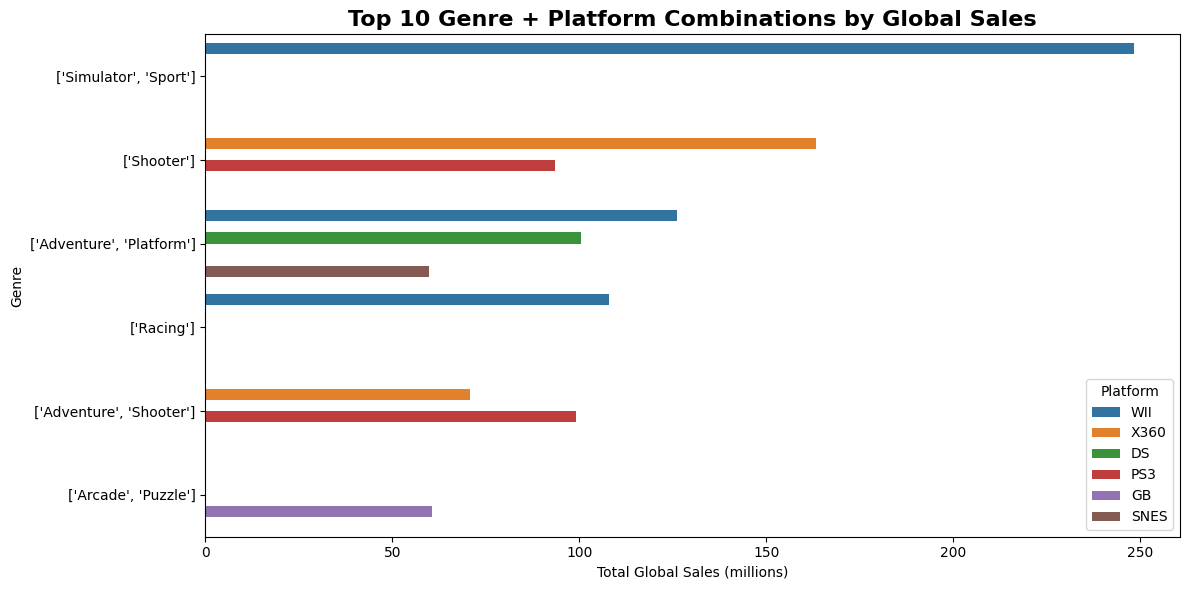

                        Genres Platform  Total_Sales
468     ['Simulator', 'Sport']      WII       248.22
465                ['Shooter']     X360       163.35
137  ['Adventure', 'Platform']      WII       126.01
406                 ['Racing']      WII       107.96
122  ['Adventure', 'Platform']       DS       100.42
252   ['Adventure', 'Shooter']      PS3        99.01
460                ['Shooter']      PS3        93.60
255   ['Adventure', 'Shooter']     X360        70.75
295       ['Arcade', 'Puzzle']       GB        60.52
136  ['Adventure', 'Platform']     SNES        59.81


In [34]:
## What are the top-performing combinations of Genre + Platform?
# Step 1: Ensure sales columns are numeric
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

# Step 2: Compute total global sales
merged['Total_Sales'] = merged[sales_cols].sum(axis=1)

# Step 3: Aggregate sales by Genre + Platform
genre_platform_sales = (
    merged.groupby(['Genres', 'Platform'], as_index=False)['Total_Sales']
    .sum()
    .sort_values(by='Total_Sales', ascending=False)
)

# Step 4: Get top 10 combinations
top_combinations = genre_platform_sales.head(10)

# Step 5: Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_combinations,
    x='Total_Sales',
    y='Genres',
    hue='Platform',
    dodge=True,
    palette='tab10'
)

plt.title("Top 10 Genre + Platform Combinations by Global Sales", fontsize=16, fontweight='bold')
plt.xlabel("Total Global Sales (millions)")
plt.ylabel("Genre")
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

print(top_combinations)

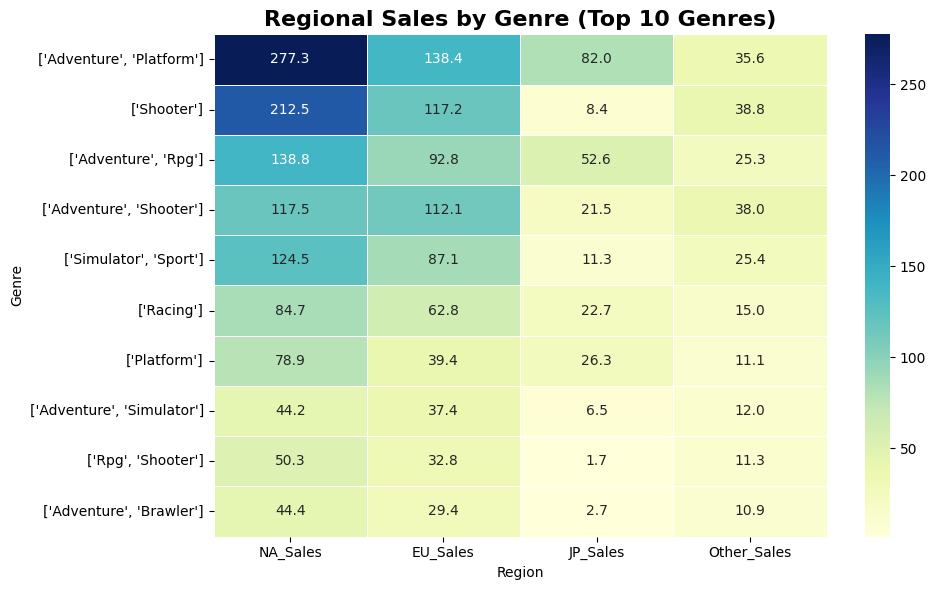

In [35]:
##What does a regional sales heatmap by genre reveal?
# Step 1: Ensure sales columns are numeric
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

# Step 2: Aggregate total sales by genre and region
genre_region_sales = merged.groupby('Genres')[sales_cols].sum()

# Step 3: Optional - focus on top 10 genres globally
top_genres = genre_region_sales.sum(axis=1).sort_values(ascending=False).head(10).index
genre_region_sales = genre_region_sales.loc[top_genres]

# Step 4: Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    genre_region_sales,
    annot=True,
    fmt=".1f",
    cmap='YlGnBu',
    linewidths=0.5
)

plt.title("Regional Sales by Genre (Top 10 Genres)", fontsize=16, fontweight='bold')
plt.xlabel("Region")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [29]:
## Step 6: MySQL Database Setup

# Connect to MySQL server 
conn = mysql.connector.connect(
    host="localhost",
    user="root",        # change if needed
    password="Santoshkumar$1979",
)
cursor = conn.cursor()

# Create Database
cursor.execute("CREATE DATABASE IF NOT EXISTS videogames;")
cursor.execute("USE videogames;")

# Drop old tables
cursor.execute("DROP TABLE IF EXISTS Merged;")
cursor.execute("DROP TABLE IF EXISTS Games;")
cursor.execute("DROP TABLE IF EXISTS Sales;")

# Create Games table
cursor.execute("""
CREATE TABLE Games (
    GameID INT AUTO_INCREMENT PRIMARY KEY,
    Title VARCHAR(255),
    Rating DECIMAL(3,2),
    Genres VARCHAR(255),
    Plays INT,
    Backlogs INT,
    Wishlist INT,
    ReleaseDate DATE,
    Team VARCHAR(255)
);
""")

# Create Sales table
cursor.execute("""
CREATE TABLE Sales (
    SaleID INT AUTO_INCREMENT PRIMARY KEY,
    Name VARCHAR(255),
    Platform VARCHAR(50),
    Year INT,
    Genre VARCHAR(100),
    Publisher VARCHAR(255),
    NA_Sales DECIMAL(10,2),
    EU_Sales DECIMAL(10,2),
    JP_Sales DECIMAL(10,2),
    Other_Sales DECIMAL(10,2),
    Global_Sales DECIMAL(10,2)
);
""")

# Create Merged table
cursor.execute("""
CREATE TABLE Merged (
    MergeID INT AUTO_INCREMENT PRIMARY KEY,
    Title VARCHAR(255),
    Platform VARCHAR(50),
    Rating DECIMAL(3,2),
    Genres VARCHAR(255),
    Plays INT,
    Wishlist INT,
    Global_Sales DECIMAL(10,2),
    Year INT,
    Publisher VARCHAR(255)
);
""")

print("✅ MySQL Database and tables created successfully!")

# Load cleaned CSVs
games = pd.read_csv("clean_games.csv")
sales = pd.read_csv("clean_vgsales.csv")
merged = pd.read_csv("merged_games_sales.csv")

# ===============================
# Helper function to clean numeric columns
# ===============================
def parse_number(x):
    if pd.isnull(x):
        return None
    if isinstance(x, (int, float)):
        return int(x)
    x = str(x).strip().upper()
    if x.endswith("K"):
        return int(float(x[:-1]) * 1000)
    elif x.endswith("M"):
        return int(float(x[:-1]) * 1000000)
    else:
        try:
            return int(float(x))
        except:
            return None

# ===============================
# Insert into Games Table
# ===============================
for _, row in games.iterrows():
    cursor.execute("""
        INSERT INTO Games (Title, Rating, Genres, Plays, Backlogs, Wishlist, ReleaseDate, Team)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
    """, (
        row['Title'], 
        float(row['Rating']) if pd.notnull(row['Rating']) else None,
        row['Genres'],
        parse_number(row['Plays']),
        parse_number(row['Backlogs']),
        parse_number(row['Wishlist']),
        row['Release Date'] if pd.notnull(row['Release Date']) else None,
        row['Team']
    ))

# ===============================
# Insert into Sales Table
# ===============================
for _, row in sales.iterrows():
    cursor.execute("""
        INSERT INTO Sales (Name, Platform, Year, Genre, Publisher, 
                           NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, (
        row['Name'],
        row['Platform'],
        int(row['Year']) if pd.notnull(row['Year']) else None,
        row['Genre'],
        row['Publisher'],
        float(row['NA_Sales']) if pd.notnull(row['NA_Sales']) else None,
        float(row['EU_Sales']) if pd.notnull(row['EU_Sales']) else None,
        float(row['JP_Sales']) if pd.notnull(row['JP_Sales']) else None,
        float(row['Other_Sales']) if pd.notnull(row['Other_Sales']) else None,
        float(row['Global_Sales']) if pd.notnull(row['Global_Sales']) else None
    ))

# ===============================
# Insert into Merged Table
# ===============================
for _, row in merged.iterrows():
    cursor.execute("""
        INSERT INTO Merged (Title, Platform, Rating, Genres, Plays, Wishlist, Global_Sales, Year, Publisher)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, (
        row['Title'],
        row['Platform'],
        float(row['Rating']) if pd.notnull(row['Rating']) else None,
        row['Genres'],
        parse_number(row['Plays']),
        parse_number(row['Wishlist']),
        float(row['Global_Sales']) if pd.notnull(row['Global_Sales']) else None,
        int(row['Year']) if pd.notnull(row['Year']) else None,
        row['Publisher']
    ))

# ===============================
# Commit & Close
# ===============================
conn.commit()
cursor.close()
conn.close()

print("✅ Data inserted successfully into Games, Sales, and Merged tables!")

✅ MySQL Database and tables created successfully!
✅ Data inserted successfully into Games, Sales, and Merged tables!
